In [2]:
library('igraph')
library('Matrix')
library('pracma')
if (!require("ITNr")) install.packages("ITNr")
library ("ITNr")

Problem 1.1a: Create undirected random networks with n = 1000 nodes, and the probability p for
drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1.
Plot the degree distributions. What distribution is observed? Explain why. Also,
report the mean and variance of the degree distributions and compare them to the
theoretical values.
Hint Useful function(s): sample_gnp , degree , degree_distribution , plot

In [8]:
# Create undirected random networks, sample_gnp uses Erdos-Renyi (I think?) 
g1 = sample_gnp(n=1000, p=0.003, directed=FALSE)
g2 = sample_gnp(n=1000, p=0.004, directed=FALSE)
g3 = sample_gnp(n=1000, p=0.01, directed=FALSE)
g4 = sample_gnp(n=1000, p=0.05, directed=FALSE)
g5 = sample_gnp(n=1000, p=0.1, directed=FALSE)

[1] 2.996
[1] 2.832817


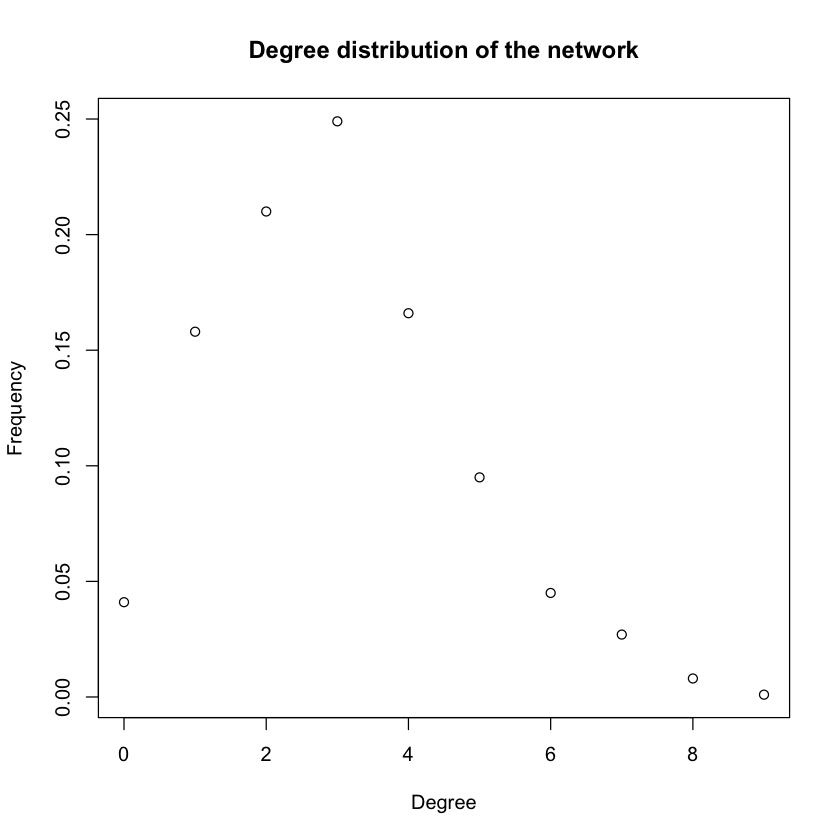

[1] 4.018
[1] 4.251928


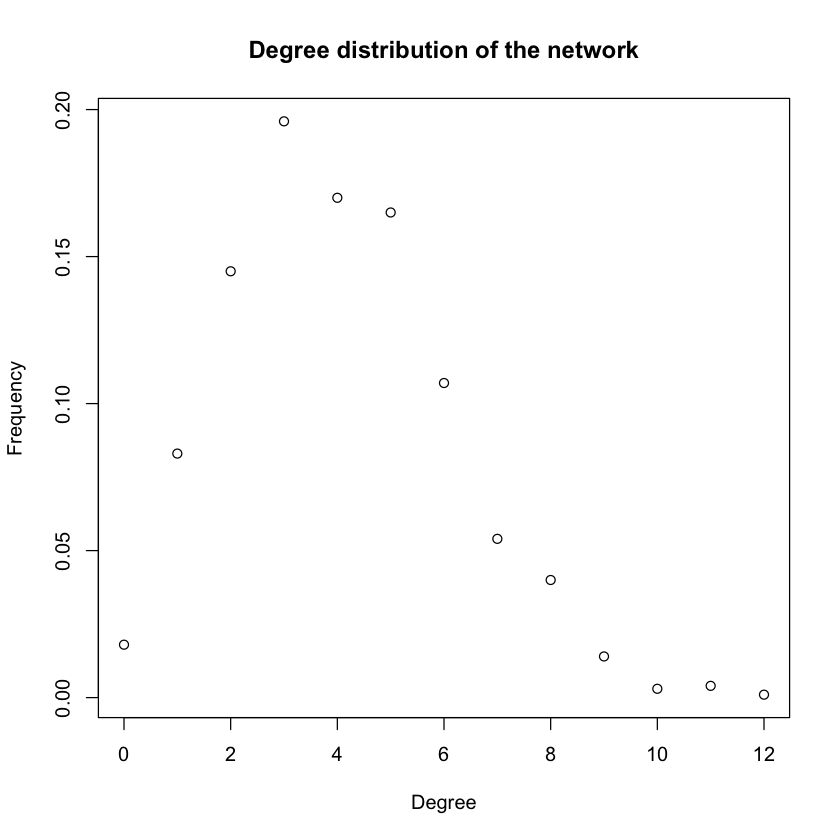

[1] 9.886
[1] 9.678683


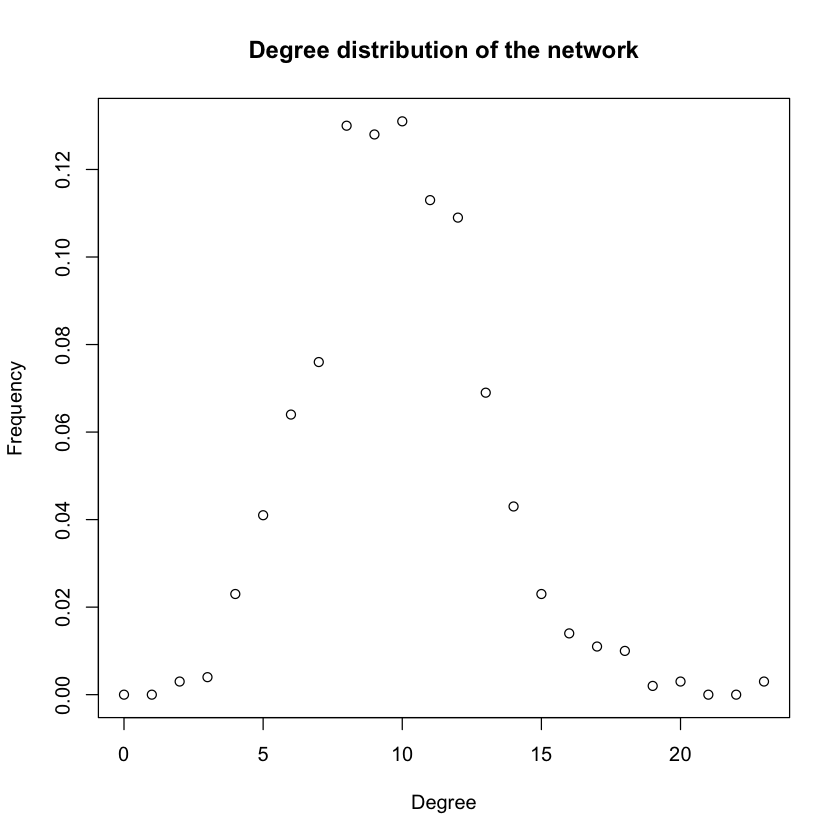

[1] 50.21
[1] 47.49339


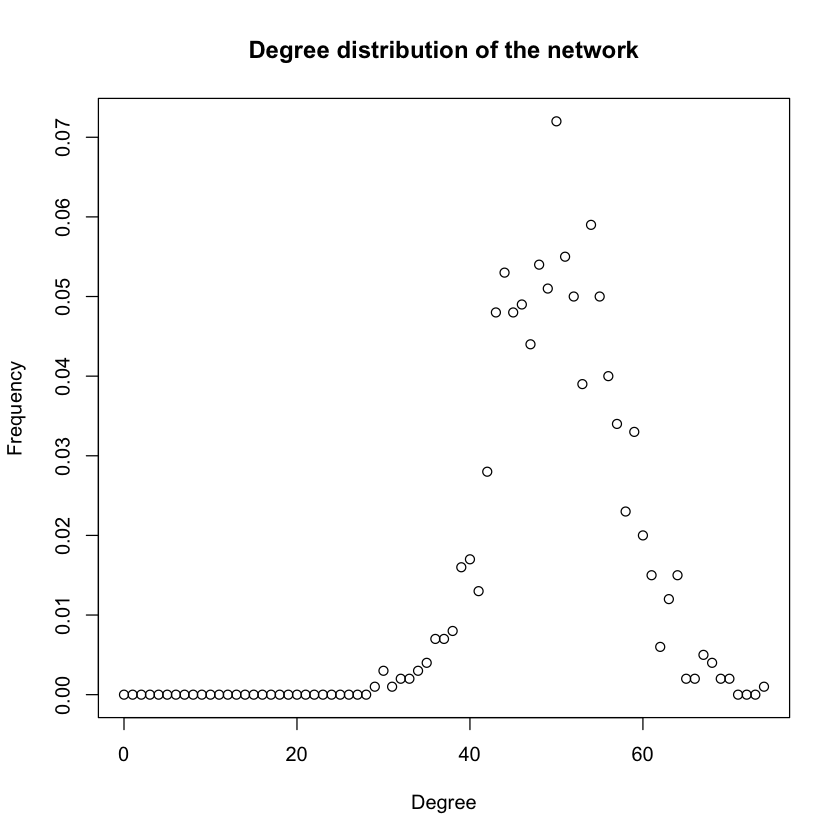

[1] 101.42
[1] 96.30591


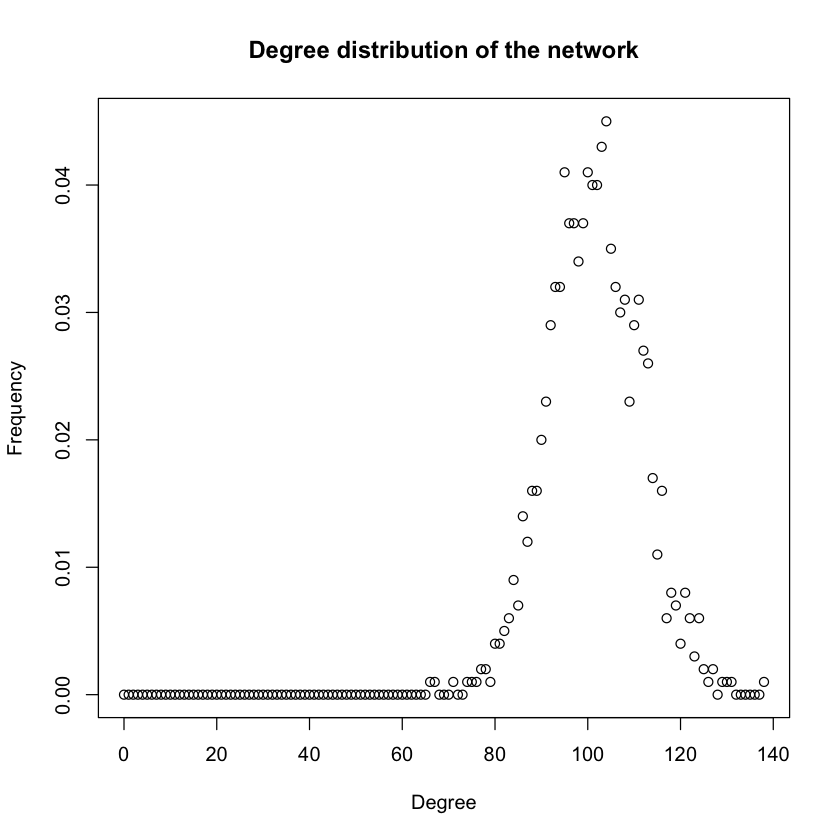

In [15]:
# Plot the degree distributions as well as their mean and variance 
for(g in list(g1, g2, g3, g4, g5)) {
    plot(seq_along(degree.distribution(g)) - 1, degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
    dist = degree(g)
    mean.result = mean(dist)
    print(mean.result) 
    variance.result = var(dist)
    print(variance.result) 
}

Problem 1.1b: For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the
probability that a generated network is connected. For one instance of the networks
with that p, find the giant connected component (GCC) if not connected. What is
the diameter of the GCC?
Hint Useful function(s): is_connected , clusters , diameter

In [30]:
# Numerically estimate the probability that a generated network is connected
# Create num_trials realizations of each graph to test 
probs = c(0.003,0.004,0.01,0.05,0.1) 
num_trials = 1000
for(pr in probs){
    count_connected <- 0 
    # try num_trials
    for(i in seq(1,num_trials,1)){
        g <- sample_gnp(n=1000, p=pr, directed=FALSE)
        if (is.connected(g)){
            count_connected <- count_connected + 1 
        }
    }
    print(sprintf("Probability of each connection: %5.3f",pr))
    print(sprintf("Estimated probability network is connected: %5.3f",count_connected/num_trials))
    
    g_components <- clusters(g)
    # which is the largest component
    ix <- which.max(g_components$csize) # like np.argmax(...)
    # get the subgraph correspondent to just the giant component
    gcc <- induced.subgraph(g, which(g_components$membership == ix))
    
    print(sprintf("Connected: %s", is.connected(g)))
    print(sprintf("GCC Diameter: %5.3f",diameter(gcc)))
    
}


[1] "Probability of each connection: 0.003"
[1] "Estimated probability network is connected: 0.000"
[1] "Connected: FALSE"
[1] "GCC Diameter: 18.000"
[1] "Probability of each connection: 0.004"
[1] "Estimated probability network is connected: 0.000"
[1] "Connected: FALSE"
[1] "GCC Diameter: 10.000"
[1] "Probability of each connection: 0.010"
[1] "Estimated probability network is connected: 0.957"
[1] "Connected: TRUE"
[1] "GCC Diameter: 6.000"
[1] "Probability of each connection: 0.050"
[1] "Estimated probability network is connected: 1.000"
[1] "Connected: TRUE"
[1] "GCC Diameter: 3.000"
[1] "Probability of each connection: 0.100"
[1] "Estimated probability network is connected: 1.000"
[1] "Connected: TRUE"
[1] "GCC Diameter: 3.000"


In [18]:
temp <- sample_gnp(n=100, p=0.1, directed=FALSE)

In [19]:
is.connected(temp)
diameter(temp)

[1] TRUE

[1] 4

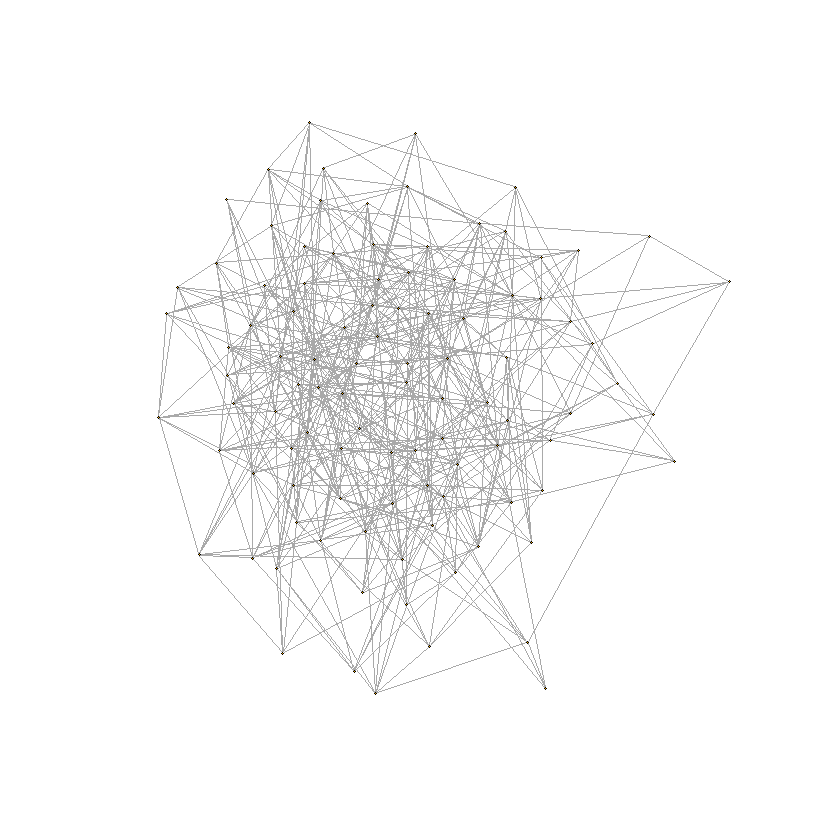

In [20]:
plot(temp, vertex.size=1, vertex.label=NA)

Problem 1.1c:  It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of
the total network size) is a highly nonlinear function of p, with interesting properties
occurring for values where p = O(
1
n
) and p = O(
ln n
n
).
For n = 1000, sweep over values of p from 0 to a pmax that makes the network almost
surely connected and create 100 random networks for each p. pmax should be roughly
determined by yourself. Then scatter plot the normalized GCC sizes vs p. Plot a line
of the average normalized GCC sizes for each p along with the scatter plot.
i. Empirically estimate the value of p where a giant connected component starts to
emerge (define your criterion of “emergence”)? Do they match with theoretical
values mentioned or derived in lectures?
ii. Empirically estimate the value of p where the giant connected component takes
up over 99% of the nodes in almost every experiment.

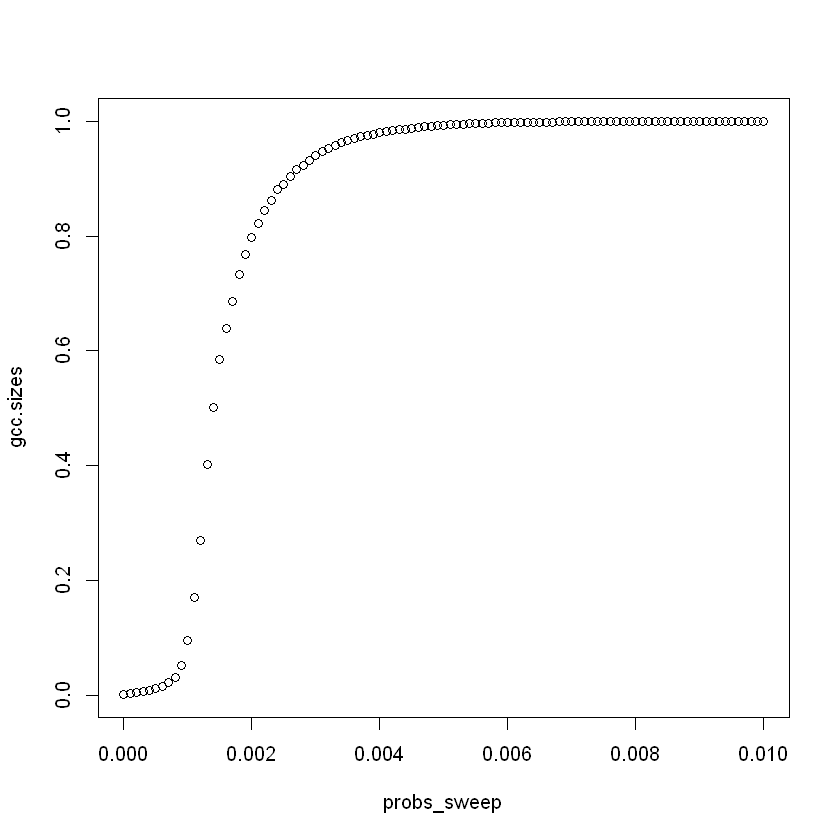

In [21]:
# 1/n = 0.001 =, ln(n)/n = 0.006 
# So sweep p from 0.0000 to 0.0100 in increments of 0.0001 
# Normalized GCC is diameter / n 

p_min = 0 
p_max = 0.01 
p_inc = 0.0001 
num_trials = 100 

# This array includes all the probabilities we are sweeping 
probs_sweep = seq(p_min, p_max, p_inc)

# Save all the mean gcc sizes here 
gcc.sizes = vector(mode="numeric",length=length(probs_sweep))

i=0
for(pr in probs_sweep){
    # Advance the position in the gcc.sizes vector 
    i=i+1
    # Accumulate sum here
    sum = 0 
    for(trial in seq(1,num_trials,1)){
        g <- sample_gnp(n=1000, p=pr, directed=FALSE)
        # Get the GCC 
        g_components <- clusters(g)
            # which is the largest component
        ix <- which.max(g_components$csize) # like np.argmax(...)
            # get the subgraph correspondent to just the giant component
        gcc <- induced.subgraph(g, which(g_components$membership == ix))
        sum = sum + (vcount(gcc)/1000) 
    }
    gcc.sizes[i] = sum / num_trials
}

plot(probs_sweep, gcc.sizes)


png 
  2

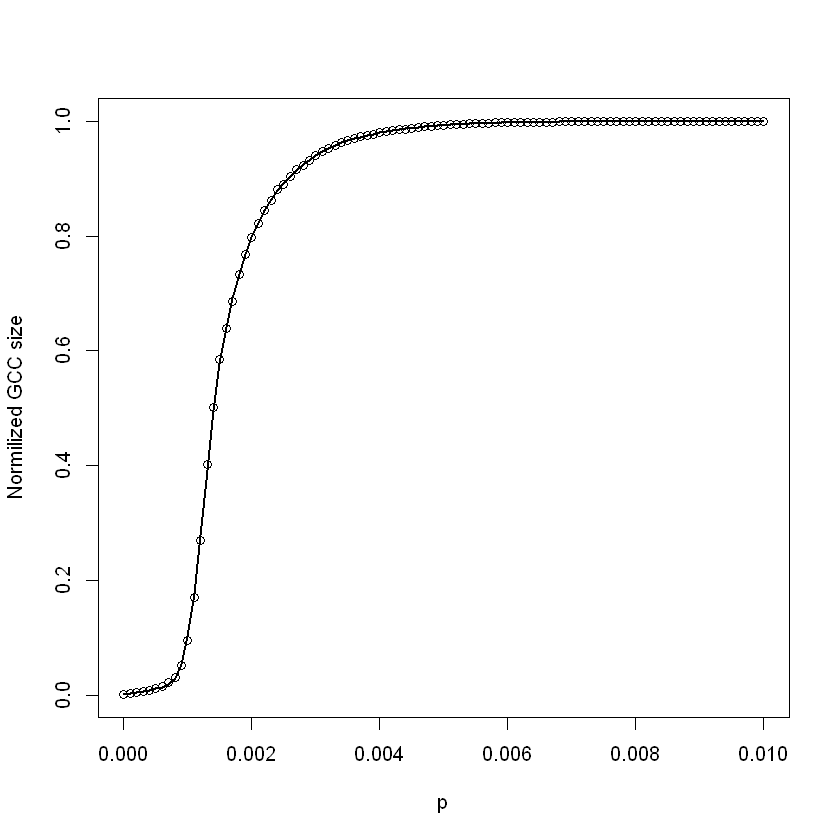

In [28]:
lo1 <- smooth.spline(probs_sweep, gcc.sizes, spar=0.3)
line1 <- predict(lo1)



plot(probs_sweep, gcc.sizes,
     xlab="p",
     ylab="Normilized GCC size",
)

lines(predict(lo1), lwd=2)



# save plot
png(file="plots/1_1_c.png", width=600, height=450)

lo1 <- smooth.spline(probs_sweep, gcc.sizes, spar=0.3)
line1 <- predict(lo1)



plot(probs_sweep, gcc.sizes,
     xlab="p",
     ylab="Normilized GCC size",
)

lines(predict(lo1), lwd=2)


dev.off()



Problem 1.1d: 

i. Define the average degree of nodes c = n × p = 0.5. Sweep over the number of
nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER
networks with n nodes and edge-formation probabilities p = c/n, as a function
of n. What trend is observed?


ii. Repeat the same for c = 1.


iii. Repeat the same for values of c = 1.1, 1.2, 1.3, and show the results for these
three values in a single plot.


iv. What is the relation between the expected GCC size and n in each case?

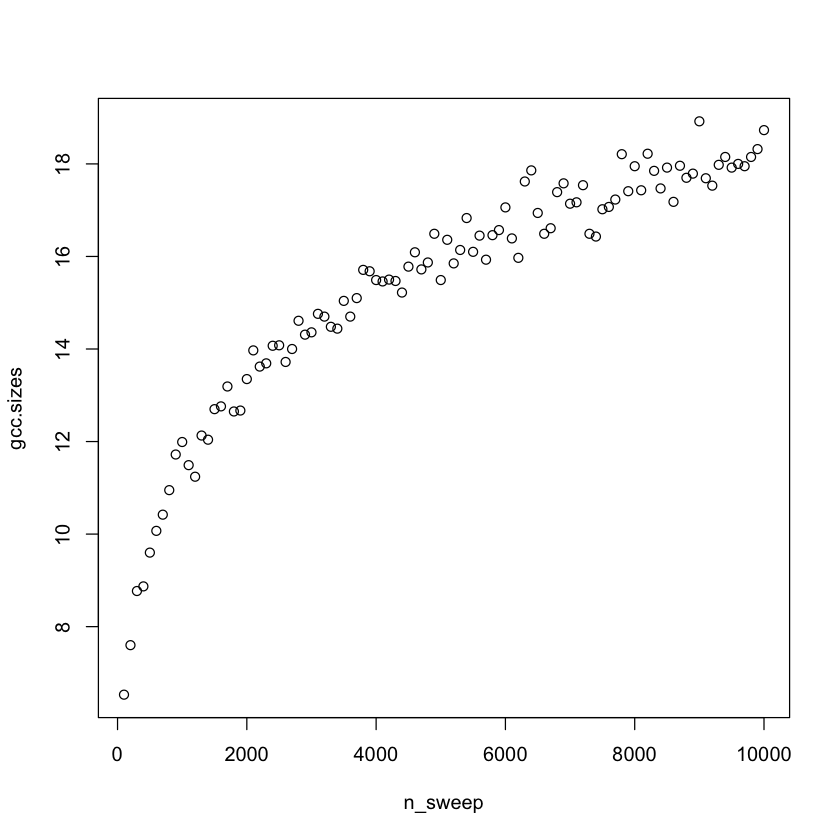

In [37]:
# Sweep over n = 100 to 10000 
# Plot expected (average over num_trials) size of the GCC of gs with n nodes and p=c/n as a function of n 

c = 0.5 
n_sweep = seq(100,10000,100) # Start at 100, end at 1000, increments of 100 
gcc.sizes = vector(mode="numeric",length=length(n_sweep))
num_trials = 100 

i=0
for(n in n_sweep){
    # Advance the position in the gcc.sizes vector 
    i=i+1
    # Accumulate sum here
    sum = 0 
    p=c/n
    for(trial in seq(1,num_trials,1)){
        g <- sample_gnp(n=n, p=p, directed=FALSE)
        # Get the GCC 
        g_components <- clusters(g)
            # which is the largest component
        ix <- which.max(g_components$csize) # like np.argmax(...)
            # get the subgraph correspondent to just the giant component
        gcc <- induced.subgraph(g, which(g_components$membership == ix))
        sum = sum + (vcount(gcc)) 
    }
    gcc.sizes[i] = sum / num_trials
}

plot(n_sweep, gcc.sizes)


In [31]:
g <- sample_gnp(n=1000, p=0.01, directed=FALSE)
diameter(g)

[1] 5

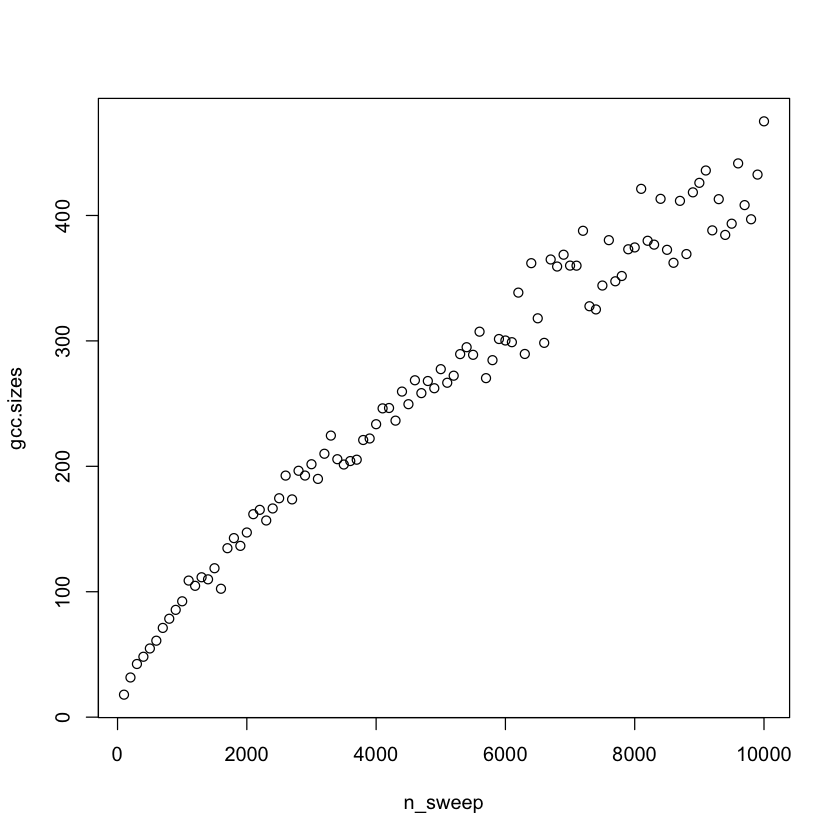

In [38]:
c = 1 
n_sweep = seq(100,10000,100) # Start at 100, end at 1000, increments of 100 
gcc.sizes = vector(mode="numeric",length=length(n_sweep))
num_trials = 100 

i=0
for(n in n_sweep){
    # Advance the position in the gcc.sizes vector 
    i=i+1
    # Accumulate sum here
    sum = 0 
    p=c/n
    for(trial in seq(1,num_trials,1)){
        g <- sample_gnp(n=n, p=p, directed=FALSE)
        # Get the GCC 
        g_components <- clusters(g)
            # which is the largest component
        ix <- which.max(g_components$csize) # like np.argmax(...)
            # get the subgraph correspondent to just the giant component
        gcc <- induced.subgraph(g, which(g_components$membership == ix))
        sum = sum + (vcount(gcc)) 
    }
    gcc.sizes[i] = sum / num_trials
}

plot(n_sweep, gcc.sizes)

In [42]:
# excuse my 3 for loops please i got scared 
n_sweep = seq(100,10000,100) # Start at 100, end at 1000, increments of 100 
num_trials = 100 

gcc.sizes1 = vector(mode="numeric",length=length(n_sweep))
c1 = 1.1 
i=0
for(n in n_sweep){
    # Advance the position in the gcc.sizes vector 
    i=i+1
    # Accumulate sum here
    sum = 0 
    p=c1/n
    for(trial in seq(1,num_trials,1)){
        g <- sample_gnp(n=n, p=p, directed=FALSE)
        # Get the GCC 
        g_components <- clusters(g)
            # which is the largest component
        ix <- which.max(g_components$csize) # like np.argmax(...)
            # get the subgraph correspondent to just the giant component
        gcc <- induced.subgraph(g, which(g_components$membership == ix))
        sum = sum + (vcount(gcc)) 
    }
    gcc.sizes1[i] = sum / num_trials
}

gcc.sizes2 = vector(mode="numeric",length=length(n_sweep))
c2 = 1.2 
i=0
for(n in n_sweep){
    # Advance the position in the gcc.sizes vector 
    i=i+1
    # Accumulate sum here
    sum = 0 
    p=c2/n
    for(trial in seq(1,num_trials,1)){
        g <- sample_gnp(n=n, p=p, directed=FALSE)
        # Get the GCC 
        g_components <- clusters(g)
            # which is the largest component
        ix <- which.max(g_components$csize) # like np.argmax(...)
            # get the subgraph correspondent to just the giant component
        gcc <- induced.subgraph(g, which(g_components$membership == ix))
        sum = sum + (vcount(gcc)) 
    }
    gcc.sizes2[i] = sum / num_trials
}

gcc.sizes3 = vector(mode="numeric",length=length(n_sweep))
c3=1.3
i=0
for(n in n_sweep){
    # Advance the position in the gcc.sizes vector 
    i=i+1
    # Accumulate sum here
    sum = 0 
    p=c3/n
    for(trial in seq(1,num_trials,1)){
        g <- sample_gnp(n=n, p=p, directed=FALSE)
        # Get the GCC 
        g_components <- clusters(g)
            # which is the largest component
        ix <- which.max(g_components$csize) # like np.argmax(...)
            # get the subgraph correspondent to just the giant component
        gcc <- induced.subgraph(g, which(g_components$membership == ix))
        sum = sum + (vcount(gcc)) 
    }
    gcc.sizes3[i] = sum / num_trials
}



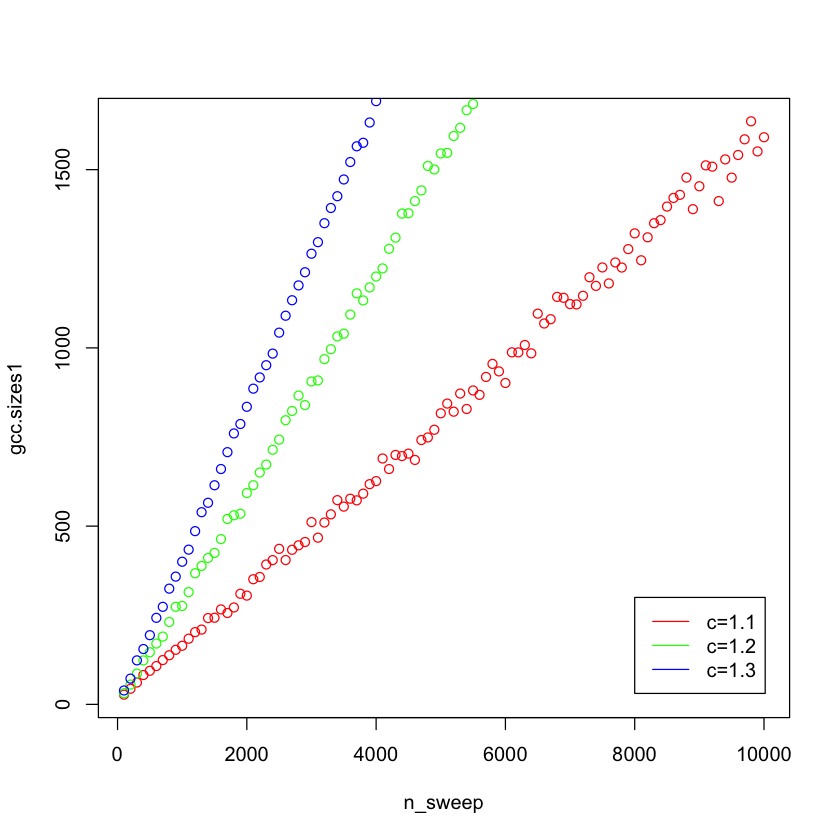

In [48]:
plot(n_sweep, gcc.sizes1, col='red')
points(n_sweep,gcc.sizes2, col='green')
points(n_sweep,gcc.sizes3, col='blue')
legend(8000,300,legend=c("c=1.1","c=1.2","c=1.3"),col=c('red','green','blue'),lty=1:1)